#### Imports

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Global variables

In [2]:
# The models with different sealing mechanism used in this test.
rings = ['O-ring','NAPN','NAP310','PK','KDN','O-ring257','X-ring257']
# The models with different cross-sectional shape used in this test
shapes = ['Circle','Stadium','Kidney', 'Stadium_lc', 'Kidney_lc']
# Remove first 15 data points to avoid deviating starting values
drop_amount = 15 

# Dynamic leakage test

In [3]:
# The position in the piston where the pressure is compared (in mm)
alpha = {
    'O-ring': 37.7,
    'NAPN': 38,
    'NAP310': 37.7,
    'PK': 37.8,
    'KDN': 37.7,
    'O-ring257': 37.7,
    'X-ring257': 37.7,
    'Circle': 36.9,
    'Stadium': 38.5,
    'Kidney': 39.3,
    'Stadium_lc': 38.5,
    'Kidney_lc': 37.4,
}

# All the pressures are selected where the laser sensor provided the value alpha +/- 0.02 mm
margin = 0.02

In [4]:
# Define a dictionary to store all data from the dynamic tests
# For each ring all variables are stored in this nested dictionary
dynamic_leakage = {}

# For each model type
for model in rings+shapes:
    # Load the data of the corresponding results in .CSV and drop unncessary columns
    model_df = pd.read_csv(f'./data/dynamic/{model}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    model_df.drop(columns=['A','B','C'],index=model_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Selecting the data points around the chosen position with the chosen margin
    model_df = model_df[(model_df['Laser(mm)'] > (alpha[model]-margin)) & (model_df['Laser(mm)'] < (alpha[model]+margin))]

    # Store the data in our larger dictionary
    dynamic_leakage[model] = {}
    # Set the time (in s)
    dynamic_leakage[model]['Time'] = model_df['Time']/1000
    dynamic_leakage[model]['Laser(mm)'] = model_df['Laser(mm)']
    # Set the pressure (in MPa)
    dynamic_leakage[model]['Pressure(bar)'] = model_df['Pressure(bar)']/10


#### Dynamic leakage plot 25mm

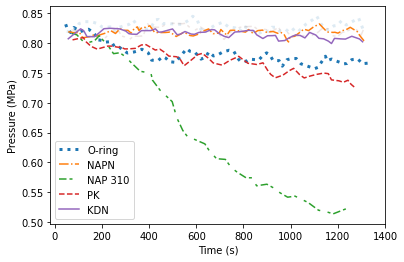

In [5]:
# To smoothen out the lines a sampling [::4] and a rolling window of 10 are applied
plt.plot(dynamic_leakage['O-ring257']['Time'][::4],dynamic_leakage['O-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue', alpha=0.25, linestyle='dotted',linewidth=3)   
plt.plot(dynamic_leakage['X-ring257']['Time'][::4],dynamic_leakage['X-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:brown', alpha=0.25, linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['O-ring']['Time'][::4],dynamic_leakage['O-ring']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue',label='O-ring', linestyle='dotted',linewidth=3)
plt.plot(dynamic_leakage['NAPN']['Time'][::4],dynamic_leakage['NAPN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(dynamic_leakage['NAP310']['Time'][::4],dynamic_leakage['NAP310']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:green',label='NAP 310', linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['PK']['Time'][::4],dynamic_leakage['PK']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:red',label='PK',linestyle='dashed')
plt.plot(dynamic_leakage['KDN']['Time'][::4],dynamic_leakage['KDN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:purple',label='KDN')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/result_dynamic_leakage_25mm.pdf',bbox_inches = 'tight')

#### Dynamic leakage plot 25.7mm

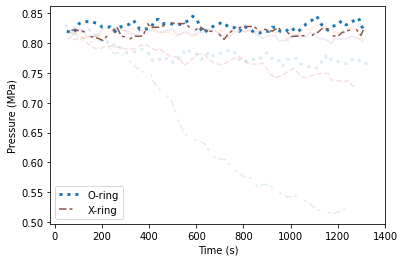

In [6]:
# To smoothen out the lines a sampling [::4] and a rolling window of 10 are applied
plt.plot(dynamic_leakage['O-ring']['Time'][::4],dynamic_leakage['O-ring']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue', alpha=0.25, linestyle='dotted',linewidth=3)
plt.plot(dynamic_leakage['NAPN']['Time'][::4],dynamic_leakage['NAPN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:orange',alpha=0.25,linestyle='dashdot')
plt.plot(dynamic_leakage['NAP310']['Time'][::4],dynamic_leakage['NAP310']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:green',alpha=0.25, linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['PK']['Time'][::4],dynamic_leakage['PK']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:red',alpha=0.25,linestyle='dashed')
plt.plot(dynamic_leakage['KDN']['Time'][::4],dynamic_leakage['KDN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:purple',alpha=0.25)
plt.plot(dynamic_leakage['O-ring257']['Time'][::4],dynamic_leakage['O-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue',label='O-ring', linestyle='dotted',linewidth=3)  
plt.plot(dynamic_leakage['X-ring257']['Time'][::4],dynamic_leakage['X-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:brown',label='X-ring', linestyle=(0,(5,2,2)))

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/result_dynamic_leakage_257mm.pdf',bbox_inches = 'tight')


#### Dynamic leakage plot different shapes

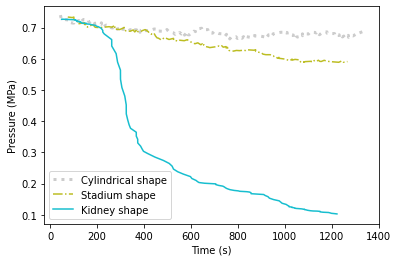

In [7]:
# To smoothen out the lines a rolling window of 10 are applied
plt.plot(dynamic_leakage['Circle']['Time'],dynamic_leakage['Circle']['Pressure(bar)'].rolling(window=10).mean(),'0.8',label='Cylindrical shape', linestyle='dotted',linewidth=3)   
plt.plot(dynamic_leakage['Stadium']['Time'],dynamic_leakage['Stadium']['Pressure(bar)'].rolling(window=10).mean(),'tab:olive',label='Stadium shape',linestyle='dashdot')   
plt.plot(dynamic_leakage['Kidney']['Time'],dynamic_leakage['Kidney']['Pressure(bar)'].rolling(window=10).mean(),'tab:cyan',label='Kidney shape')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/result_dynamic_leakage_shapes.pdf',bbox_inches = 'tight')



#### Dynamic leakage plot different shapes with lower clearance

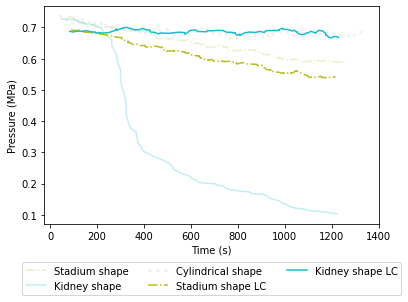

In [8]:
# To smoothen out the lines a rolling window of 10 are applied
plt.plot(dynamic_leakage['Stadium']['Time'],dynamic_leakage['Stadium']['Pressure(bar)'].rolling(window=10).mean(),'tab:olive',alpha=0.25,label='Stadium shape',linestyle='dashdot')   
plt.plot(dynamic_leakage['Kidney']['Time'],dynamic_leakage['Kidney']['Pressure(bar)'].rolling(window=10).mean(),'tab:cyan',alpha=0.25,label='Kidney shape')
plt.plot(dynamic_leakage['Circle']['Time'],dynamic_leakage['Circle']['Pressure(bar)'].rolling(window=10).mean(),'0.8', alpha=0.25 ,label='Cylindrical shape', linestyle='dotted',linewidth=3)   
plt.plot(dynamic_leakage['Stadium_lc']['Time'],dynamic_leakage['Stadium_lc']['Pressure(bar)'].rolling(window=10).mean(),'tab:olive',label='Stadium shape LC',linestyle='dashdot')   
plt.plot(dynamic_leakage['Kidney_lc']['Time'],dynamic_leakage['Kidney_lc']['Pressure(bar)'].rolling(window=10).mean(),'tab:cyan',label='Kidney shape LC')

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.35),ncol=3)
plt.savefig('./figures/app_dynamic_leakage_shapes_lc.pdf',bbox_inches = 'tight')


# Repeatablilty

### Reconnected

In [9]:
# The position in the piston where the pressure is compared, different to initial setup
# Each number stands for the specific repeated test
alpha = {
    1: 37.7,
    2: 35.5,
    3: 38.5
}

In [10]:
# Store repeatability data in a dictionary
dynamic_reconnected = {}

# Iterate all 3 repeated tests and add them to the dictionary
for test in range(1,4):
    # Load the data of the corresponding results of the O-ring 25.7 mm in .CSV and drop unncessary columns
    test_df = pd.read_csv(f'./data/repeatability/reconnected/dynamic/{test}_O-ring257.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Selecting the data points around the chosen position
    test_df = test_df[(test_df['Laser(mm)'] > (alpha[test]-margin)) & (test_df['Laser(mm)'] < (alpha[test]+margin))]

    # Store the data in the dictionary
    dynamic_reconnected[test] = {}
    # Set the time (in s)
    dynamic_reconnected[test]['Time'] = test_df['Time']/1000
    dynamic_reconnected[test]['Laser(mm)'] = test_df['Laser(mm)']
    # Set the pressure (in MPa)dynamic_rerun[test] = {}
    dynamic_reconnected[test]['Pressure(bar)'] = test_df['Pressure(bar)']/10


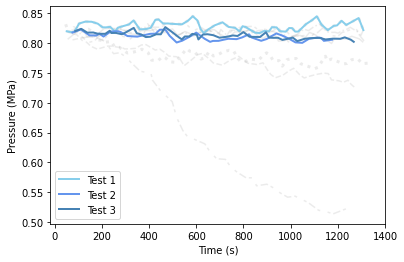

In [11]:
# To smoothen out the lines a sampling [::4] and a rolling window of 10 are applied
plt.plot(dynamic_leakage['O-ring']['Time'][::4],dynamic_leakage['O-ring']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey', alpha=0.25, linestyle='dotted',linewidth=3)
plt.plot(dynamic_leakage['NAPN']['Time'][::4],dynamic_leakage['NAPN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25,linestyle='dashdot')
plt.plot(dynamic_leakage['NAP310']['Time'][::4],dynamic_leakage['NAP310']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25, linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['PK']['Time'][::4],dynamic_leakage['PK']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25,linestyle='dashed')
plt.plot(dynamic_leakage['KDN']['Time'][::4],dynamic_leakage['KDN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25)
plt.plot(dynamic_leakage['O-ring257']['Time'][::4],dynamic_leakage['O-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25, linestyle='dotted',linewidth=3)  
plt.plot(dynamic_leakage['X-ring257']['Time'][::4],dynamic_leakage['X-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25, linestyle=(0,(5,2,2)))
plt.plot(dynamic_reconnected[1]['Time'][::4],dynamic_reconnected[1]['Pressure(bar)'].rolling(window=10).mean()[::4],'skyblue',label='Test 1',linewidth=2)
plt.plot(dynamic_reconnected[2]['Time'][::4],dynamic_reconnected[2]['Pressure(bar)'].rolling(window=10).mean()[::4],'cornflowerblue',label='Test 2',linewidth=2)
plt.plot(dynamic_reconnected[3]['Time'][::4],dynamic_reconnected[3]['Pressure(bar)'].rolling(window=10).mean()[::4],'steelblue',label='Test 3',linewidth=2)

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/app_dynamic_leakage_reconnected.pdf',bbox_inches = 'tight')


### Rerun

In [12]:
# The position in the piston where the pressure is compared, different to initial setup
# Each number stands for the specific repeated test
alpha = {
    1: 38.5,
    2: 35.5,
    3: 35.5
}

In [13]:
# Store repeatability data in a dictionary
dynamic_rerun = {}

# Iterate all 3 repeated tests and add them to the dictionary
for test in alpha.keys():
    # Load the data of the corresponding results of the O-ring 25.7 mm in .CSV and drop unncessary columns
    test_df = pd.read_csv(f'./data/repeatability/rerun/dynamic/{test}_O-ring257.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Selecting the data points around the chosen position with the chosen margin
    test_df = test_df[(test_df['Laser(mm)'] > (alpha[test]-margin)) & (test_df['Laser(mm)'] < (alpha[test]+margin))]

    # Store the data in the dictionary
    dynamic_rerun[test] = {}
    # Set the time (in s)
    dynamic_rerun[test]['Time'] = test_df['Time']/1000
    dynamic_rerun[test]['Laser(mm)'] = test_df['Laser(mm)']
    # Set the pressure (in MPa)dynamic_rerun[test] = {}
    dynamic_rerun[test]['Pressure(bar)'] = test_df['Pressure(bar)']/10


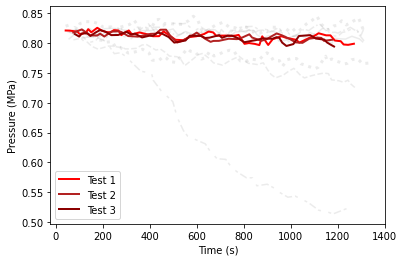

In [14]:
# To smoothen out the lines a sampling [::4] and a rolling window of 10 are applied
plt.plot(dynamic_leakage['O-ring']['Time'][::4],dynamic_leakage['O-ring']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey', alpha=0.25, linestyle='dotted',linewidth=3)
plt.plot(dynamic_leakage['NAPN']['Time'][::4],dynamic_leakage['NAPN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25,linestyle='dashdot')
plt.plot(dynamic_leakage['NAP310']['Time'][::4],dynamic_leakage['NAP310']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25, linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['PK']['Time'][::4],dynamic_leakage['PK']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25,linestyle='dashed')
plt.plot(dynamic_leakage['KDN']['Time'][::4],dynamic_leakage['KDN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25)
plt.plot(dynamic_leakage['O-ring257']['Time'][::4],dynamic_leakage['O-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25, linestyle='dotted',linewidth=3)  
plt.plot(dynamic_leakage['X-ring257']['Time'][::4],dynamic_leakage['X-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:grey',alpha=0.25, linestyle=(0,(5,2,2)))
plt.plot(dynamic_rerun[1]['Time'][::4],dynamic_rerun[1]['Pressure(bar)'].rolling(window=10).mean()[::4],'red',label='Test 1',linewidth=2)
plt.plot(dynamic_rerun[2]['Time'][::4],dynamic_rerun[2]['Pressure(bar)'].rolling(window=10).mean()[::4],'firebrick',label='Test 2',linewidth=2)
plt.plot(dynamic_rerun[3]['Time'][::4],dynamic_rerun[3]['Pressure(bar)'].rolling(window=10).mean()[::4],'darkred',label='Test 3',linewidth=2)

# Set the labels and save the figure
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/app_dynamic_leakage_rerun.pdf',bbox_inches = 'tight')
